In [1]:
import numpy as np
import matplotlib.pyplot as plt
import helpers.cusplot as cplt


## constants (SI)

In [6]:
# general
c = 299792458
m_pr = 938.272 # MeV

# kicker
brho = 1.23 
lgap = 0.1
kick_l = 0.5
N = 20
u0 = 4*np.pi*1e-7

l = 3 # dist. kicker-septum

# charge distribution
sigma = 0.015
delta_x_max = 0.01

# septum
w = 0.005 # 5 mm thickness for DC septum (CERN paper)
# assuming infinte extend in y (valid - 100 mm beam tube > 6 sigma)

In [4]:
# numeric integration of current fraction 
# incident on septum
d = {}

for delta_x in np.linspace(0,delta_x_max,10):
    I = 0
    for step in np.linspace(2*sigma-w/2, 2*sigma + w/2,10):
        I += np.exp(-(step-delta_x)**2/(2*sigma**2))*w/10
    
    I_norm = 1/(np.sqrt(2*np.pi)*sigma)*I
    
    d[delta_x] = I_norm

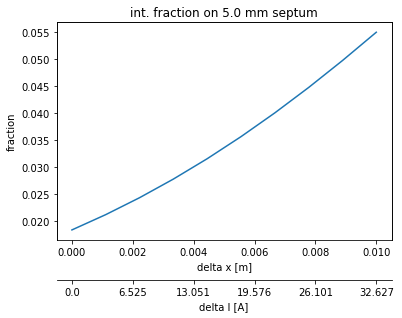

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(*zip(*sorted(d.items())))
ax.set_xlabel('delta x [m]')
ax.set_ylabel('fraction')

ax.set_title('int. fraction on {} mm septum'.format(w*1e3))

#convert spat. to curr_off
def dx_to_dI(dx):
    dThet = dx/l
    dI = brho*lgap/(u0*kick_l*N)*dThet
    return round(dI,3)

cplt.add_axis(ax, 'x', dx_to_dI, 'delta I [A]' )

plt.show()

## el. vs. magn. field

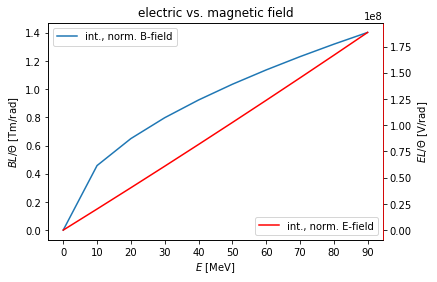

In [65]:
# integrated B-field / E-field norm. to kick angle
M = 1 # 1:MeV, 1e-3: keV, ...

T = np.arange(0,100,10)* M# MeV
p = np.sqrt(T**2+2*T*m_pr) # MeV

mag = p*1e-3/0.3 * M

el = p/m_pr*c*p*1e-3/0.3 * M

ax = plt.gca()
ax.set_xlabel(r'$E$ [MeV]')
ax.set_xticks(T)
ax.set_ylabel(r'$BL/\Theta$ [Tm/rad]')
ax.set_title('electric vs. magnetic field')
ax1 = ax.twinx()
ax1.set_ylabel(r'$EL/\Theta$ [V/rad]')
ax1.spines['right'].set_color('r')

ax.plot(T,mag)
ax1.plot(T,el, c = 'r')
ax.legend(['int., norm. B-field'], loc = 2)
ax1.legend(['int., norm. E-field'], loc = 4)

plt.savefig('/home/marius/Jülich/Multiplexer/Plots/elvsmagn')
plt.show()

## quadrupole deflection study

In [56]:
k = 8/1.23
l_lens = 0.05
l_dist = np.arange(0,2,0.1)
l_dist_2 = np.arange(0,3,0.1)
l_kick = 1

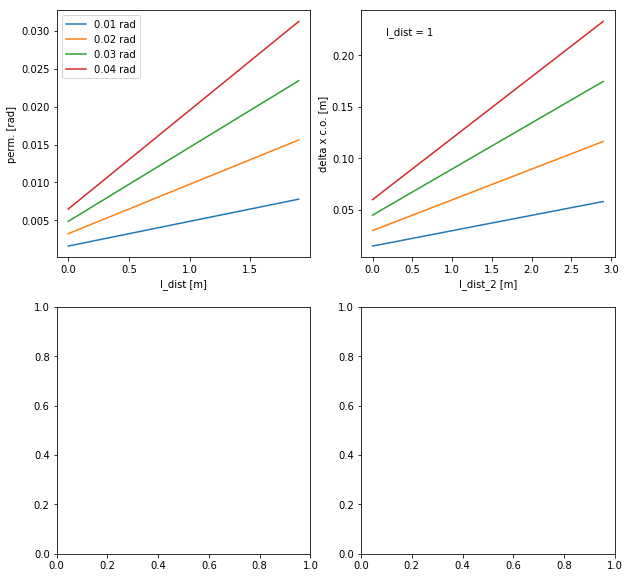

In [64]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
angles = np.arange(0.01,0.05,0.01)
l_d_f = 1

def xbar(k,l_lens,l_dist,l_kick,theta):
    return k*l_lens*(l_dist*theta + l_kick*theta/2)

for theta in angles:
    ax[0,0].plot(l_dist,xbar(k,l_lens,l_dist,l_kick,theta))
    ax[0,0].set_xlabel('l_dist [m]')
    ax[0,0].set_ylabel('perm. [rad]')
    
    ax[0,1].plot(l_dist_2,(xbar(k,l_lens,l_d_f,l_kick,theta)+theta)*l_dist_2+l_d_f*theta + l_kick*theta/2)
    ax[0,1].set_xlabel('l_dist_2 [m]')
    ax[0,1].set_ylabel('delta x c.o. [m]')
    
    
ax[0,0].legend(['{} rad'.format(item) for item in angles.tolist()])
ax[0,1].text(0.1,0.9,'l_dist = {}'.format(l_d_f),transform=ax[0,1].transAxes)
# mostly affected by dist. from kicker to quad + theta + quad strength
# keeping kicker below 50 mrad req. stronger quad
# longer l_dist makes the distance from quad 2 problematic
# TODO: calculate focusing position (scales w/ f**2/d, f from one quad., distance from?!)
# f_D = f**2/d = k*l_lens/l_bq
plt.show()